#### About
AprilTags detection using OpenCV.
1. AprilTags are distinct special markers placed in the view of the camera such that they are easily identifiable. 
2. They are square with binary values having background as black and foreground as white. The black border surrounding the pattern makes it easier to detect them.
3. They are used for camera calibration, object size estimation, measuring the distance between camera and object, 3D position, object orientation, robotics and autonomus navigation etc.
4. AprilTag family are illustrated below. A family in AprilTags defines a set of tags that an AprilTag detector will look out in the input image.
![AprilTags](AprilTags.png)


More details at - https://april.eecs.umich.edu/software/apriltag


In [ ]:
#installing april tags
#!pip install apriltag

In [7]:
import cv2
import apriltag
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#loading the image as grayscale
image = cv2.imread('Img1.png',0)

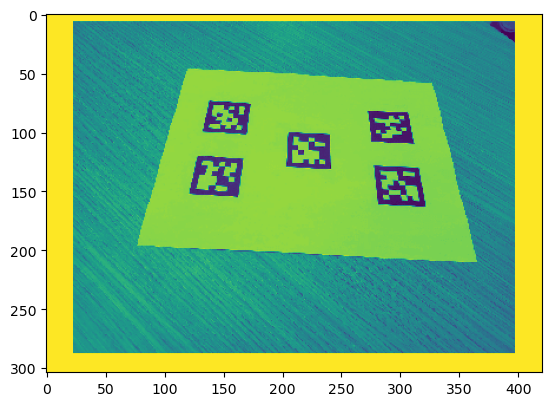

In [9]:
plt.imshow(image)
plt.show()

In [12]:
options = apriltag.DetectorOptions(families="tag36h11")
detector = apriltag.Detector(options)
results = detector.detect(image)
print(results)

[Detection(tag_family=b'tag36h11', tag_id=25, hamming=0, goodness=0.0, decision_margin=91.09166717529297, homography=array([[-7.85743380e-01,  3.59350971e-01,  6.86538106e+00],
       [-3.21426178e-02, -4.31580561e-01,  3.92519209e+00],
       [ 1.26103906e-04,  1.68720278e-03,  4.46043140e-02]]), center=array([153.91742294,  88.00027929]), corners=array([[170.40434265, 102.56629944],
       [132.8963623 , 100.47181702],
       [138.71862793,  74.57230377],
       [173.51681519,  76.37220001]])), Detection(tag_family=b'tag36h11', tag_id=40, hamming=0, goodness=0.0, decision_margin=91.39166259765625, homography=array([[-6.56490619e-01,  3.08910974e-01,  9.49685094e+00],
       [ 1.80582032e-02, -4.66261047e-01,  4.94327534e+00],
       [ 5.28397570e-04,  1.40023975e-03,  4.26187576e-02]]), center=array([222.83265576, 115.98825553]), corners=array([[241.93663025, 132.50091553],
       [204.3611908 , 130.01187134],
       [205.38285828, 100.90539551],
       [240.5635376 , 102.52689362]])

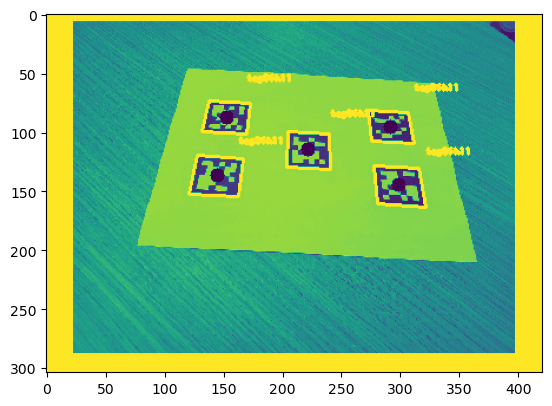

In [13]:
#overlaying the result
for r in results:
    pt1,pt2,pt3,pt4 = r.corners
    pt1 = (int(pt1[0]), int(pt1[1]))
    pt2 = (int(pt2[0]), int(pt2[1]))
    pt3 = (int(pt3[0]), int(pt3[1]))
    pt4 = (int(pt4[0]), int(pt4[1]))

    #drawing the bounding box
    cv2.line(image, pt1,pt2,(255,0,0),2)
    cv2.line(image, pt2,pt3,(255,0,0),2)
    cv2.line(image, pt3,pt4,(255,0,0),2)
    cv2.line(image, pt4,pt1,(255,0,0),2)

    #drawing the center of apriltag
    c1,c2 = int(r.center[0]), int(r.center[1])
    cv2.circle(image,(c1,c2), 6,(0,255,0),-1)

    tagFamily = r.tag_family.decode("utf-8")
    cv2.putText(image,tagFamily,(pt1[0],pt1[1]-45), cv2.FONT_HERSHEY_PLAIN,0.5, (255,0,0),2)


plt.imshow(image)
